In [44]:
import cv2
import csv
import os
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
DATA_ROOT = 'data/'
DATA_DIRS = [
#     'data',
    'track1_bridge',
    'track1_center',
    'track1_center_ccw',
    'track1_curve',
    'track1_curve_ccw',
    'track1_light_recover',
    'track1_recover',
    'track1_recover_ccw',
#     'track2_center',
    #'track2_center_ccw'
]
IMAGE_WIDTH=320
IMAGE_HEIGHT=160

In [102]:
samples = []
for data_dir in DATA_DIRS:
    with open(os.path.join(DATA_ROOT, data_dir, 'driving_log.csv')) as csvfile:
        reader = csv.reader(csvfile)
        header = True
        for line in reader:
            if header:
                header = False
            else:
                samples.append(line)

In [99]:
print(len(samples))

20465


In [37]:
steerings = [float(s[3]) for s in samples]
hist, bins = np.histogram(steerings, bins=20, range=(-1.0, 1.0))

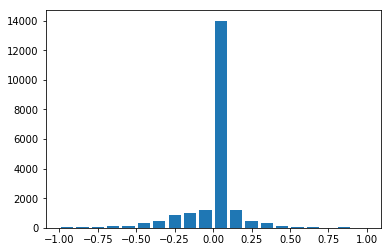

In [24]:
def plot_distribution(x_data, y_data):
    width = 0.8*(bins[1]-bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    plt.show()

plot_distribution(hist, bins)

In [47]:
def random_brightness(image, multiplier=0.4):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    ratio = 1.0 + multiplier * (np.random.rand() - 0.5)    
    hsv[:,:,2] = hsv[:,:,2] * ratio
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

In [60]:
def random_shadow(image):
    #(x1, y1) and (x2, y2) forms a line
    # xm, ym gives all the locations of the image
    x1, y1 = IMAGE_WIDTH * np.random.rand(), 0
    print(x1, y1)
    x2, y2 = IMAGE_WIDTH * np.random.rand(), IMAGE_HEIGHT
    print(x2, y2)
    xm, ym = np.mgrid[0:IMAGE_HEIGHT, 0:IMAGE_WIDTH]
    # mathematically speaking, we want to set 1 below the line and zero otherwise
    # Our coordinate is up side down.  So, the above the line: 
    # (ym-y1)/(xm-x1) > (y2-y1)/(x2-x1)
    # as x2 == x1 causes zero-division problem, we'll write it in the below form:
    # (ym-y1)*(x2-x1) - (y2-y1)*(xm-x1) > 0
    mask = np.zeros_like(image[:, :, 1])
    mask[(ym - y1) * (x2 - x1) - (y2 - y1) * (xm - x1) > 0] = 1
    # choose which side should have shadow and adjust saturation
    cond = mask == np.random.randint(2)
    s_ratio = np.random.uniform(low=0.2, high=0.5)
    # adjust Saturation in HLS(Hue, Light, Saturation)
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    hls[:, :, 1][cond] = hls[:, :, 1][cond] * s_ratio
    return cv2.cvtColor(hls, cv2.COLOR_HLS2RGB)

In [49]:
def read_image(x):
    print(x)
    h1, t1 = os.path.split(x)
    h2, t2 = os.path.split(h1)
    _, t3 = os.path.split(h2)
    image_path = os.path.join(DATA_ROOT, t3, t2, t1)
    print(image_path)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [41]:
def plot_images(images, titles, columns, image_height, cmap=plt.jet()):
    rows = (len(images) + columns - 1) // columns
    fig_height = rows * image_height
    fig, axs = plt.subplots(rows, columns, figsize=(15, fig_height))
    fig.subplots_adjust(hspace=0.2, wspace=0.001)
    axs = axs.ravel()
    for idx, image in enumerate(images):
        axs[idx].axis('off')
        axs[idx].imshow(image, cmap)
        axs[idx].set_title(titles[idx])

<Figure size 432x288 with 0 Axes>

/Users/wilsonhong/Projects/CarND/CarND-Behavioral-Cloning-P3/data/track1_bridge/IMG/center_2018_08_26_14_16_48_058.jpg
data/track1_bridge/IMG/center_2018_08_26_14_16_48_058.jpg


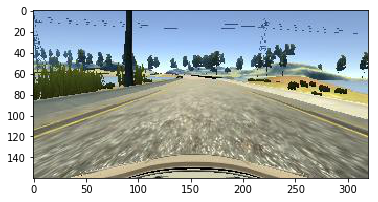

In [103]:
image = read_image(samples[0][0])
plt.imshow(image)

104.56457545153725 0
12.326123010448988 160


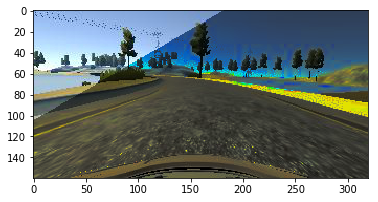

In [88]:
shadow_image = random_shadow(image)
plt.imshow(shadow_image)

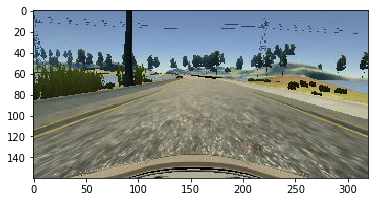

In [72]:
bright_image = random_brightness(image)
plt.imshow(bright_image)

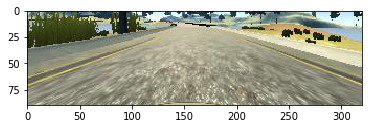

In [104]:
crop_image = image[50:-20:,:]
plt.imshow(crop_image)